# Coin Toss Experiment — LLN & CLT

## Purpose;
This project demonstrates the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)** using a simple coin-toss experiment.

The procedure advances through the following sample sizes:
$$
\mathbf{Sample\ sizes:}\ \{N_k\}_{k=1}^{11}
= \{\,5,\;3\times10^{1},\;10^{2},\;3\times10^{2},\;8\times10^{2},\;10^{3},\;2.5\times10^{3},\;4\times10^{3},\;10^{4},\;5\times10^{4},\;10^{5}\,\}.
$$

$$
\text{(equivalently) } (N_k) = (5,\,30,\,100,\,300,\,800,\,1000,\,2500,\,4000,\,10000,\,50000,\,100000).
$$


For each N, two panels are shown:
- **(A) LLN** — Running mean of a single length-N sequence of Bernoulli(0.5) trials, illustrating stabilization of the sample mean near *p = 0.5* as *n* grows.
- **(B) CLT** — Sampling distribution of $\hat p$ across *M* independent experiments, with the Normal approximation $\mathcal{N}\!\big(p,\;p(1-p)/n\big)$ overlaid.

The goal is to visualize both laws in action: as the number of flips increases, the relative frequency of heads converges to 0.5 (LLN), while the distribution of sample proportions over repeated experiments becomes approximately Normal with variance $p(1-p)/n$ (CLT). This simulation reproduces in seconds what would otherwise require tens of thousands of manual tosses. **Let’s see how it works.**


---

## How to Run;

### Prerequisites;
- Python ≥ 3.9
- Packages: `numpy`, `matplotlib`

Install once:
    pip install numpy matplotlib
    # or
    # pip install -r requirements.txt

---

### Command Line (recommended);
Save the script as `coin_experiment.py`, then run:

    # Default schedule; deterministic with seed=42
    python coin_experiment.py --p 0.5 --seed 42

    # Interactive mode (advance manually; press Enter to step, 'q' to quit)
    python coin_experiment.py --interactive

    # Save each figure as PNG
    python coin_experiment.py --outdir plots

    # Custom N schedule (comma-separated)
    python coin_experiment.py --ns "5,30,100,300,800,1000,2500,4000,10000,50000,100000"

    # Fresh randomness (no fixed seed)
    python coin_experiment.py --seed None

---

### Jupyter / Notebook (notebook-safe);
The script ignores unknown ipykernel args and is safe to `%run`:

    %run coin_experiment.py --p 0.5 --seed 42
    # or without saving figures:
    %run coin_experiment.py --ns "5,30,100,300,800,1000,2500,4000,10000,50000,100000"

Alternatively, import and call the driver directly:

    from coin_experiment import run_experiment, NS_DEFAULT
    run_experiment(NS=NS_DEFAULT, p=0.5, seed=42, interactive=False, outdir=None)

---

### Reproducibility & Terminology;
- **Reproducibility:** With a fixed seed (`--seed 42`), results are deterministic. Use `--seed None` for fresh randomness.
- **Design:** For each sample size $N$ in  
  $ (5,\,30,\,100,\,300,\,800,\,1000,\,2500,\,4000,\,10000,\,50000,\,100000) $,  
  panel (A) plots the running mean $\hat p_n = \frac{1}{n}\sum_{i=1}^{n}X_i$ (LLN),  
  panel (B) plots the sampling distribution of $\hat p$ over $M$ independent experiments with Normal overlay $\mathcal{N}\!\big(p,\;p(1-p)/N\big)$ (CLT).


---

### Setup;
Let $X_i \sim \text{Bernoulli}(p)$, $i=1,2,\dots,n$, independent.  
We observe heads (1) or tails (0).  
The sample mean is:
$$
\hat{p}_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

---

### Law of Large Numbers (LLN);
As $n$ increases along a single realization:
$$
\hat{p}_n \;\to\; p \quad \text{(almost surely).}
$$

In practice, you will see the running mean curve stabilize around $p=0.5$.  
This addresses **convergence of one path**.

---

### Central Limit Theorem (CLT);
Across many independent experiments (each of size $n$):
$$
\sqrt{n}\,\big(\hat{p}_n - p\big) \;\;\Rightarrow\;\; \mathcal{N}\!\left(0,\;p(1-p)\right)
$$

Equivalently:
$$
\hat{p}_n \;\approx\; \mathcal{N}\!\left(p,\;\frac{p(1-p)}{n}\right).
$$

Hence, the histogram of $\hat{p}$ looks Gaussian with variance shrinking as $1/n$. The overlaid bell curve is $\mathcal{N}(p,\,p(1-p)/n)$. This addresses **distribution across many paths**.

---

### Why Both?
- **LLN** explains stabilization of the average in a single long run.  
- **CLT** explains the spread of averages across many independent runs at fixed \(n\).  

Seeing them together avoids the common confusion between convergence of a sequence (LLN) and the distributional shape of sample averages (CLT).



Coin Toss Experiment — LLN & CLT
Sequence lengths (N): [5, 30, 100, 300, 800, 1000, 2500, 4000, 10000, 50000, 100000]
p = 0.50 | seed = 42

N =      5 | Heads =      2 | Tails =      3


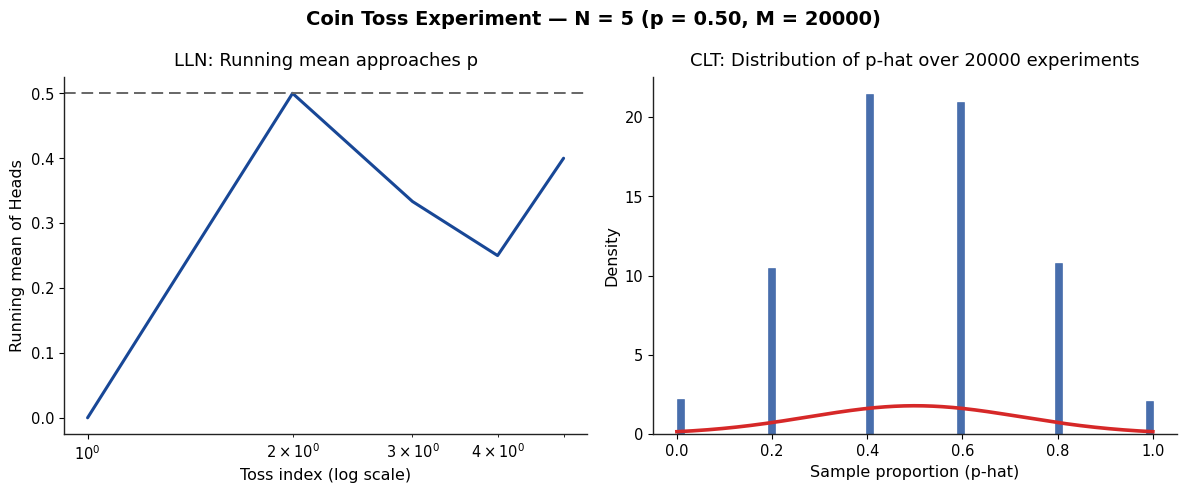

N =     30 | Heads =     14 | Tails =     16


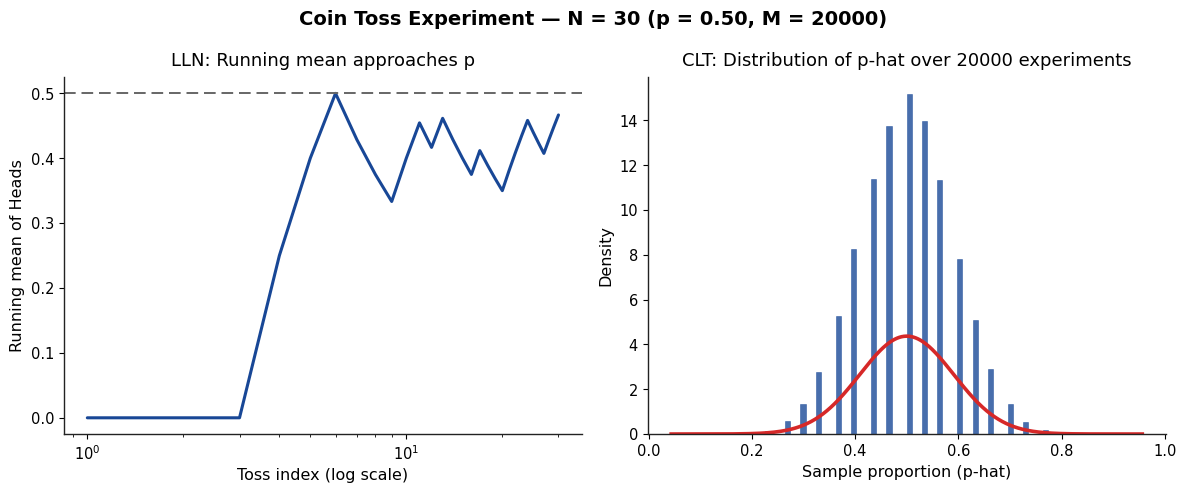

N =    100 | Heads =     55 | Tails =     45


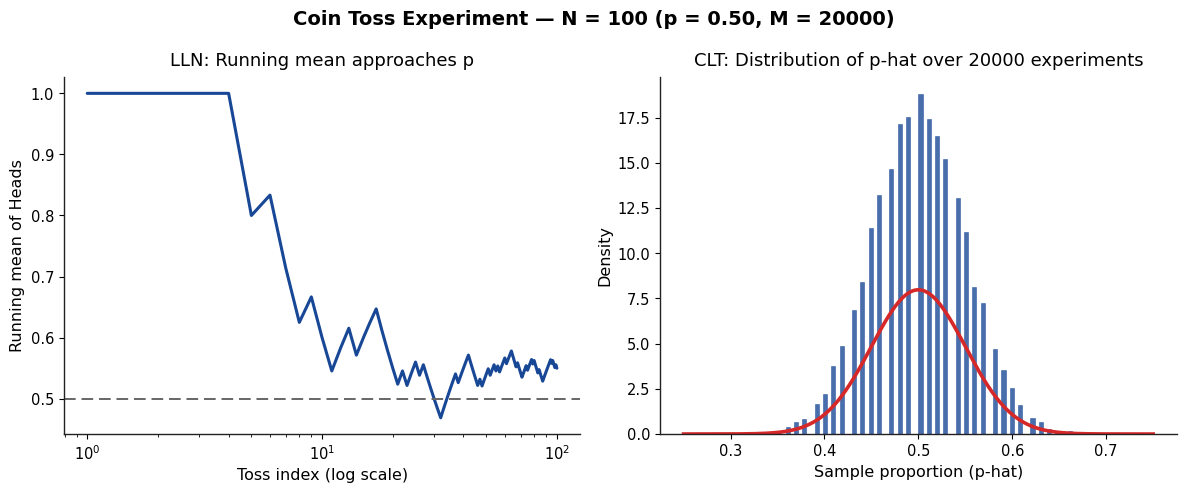

N =    300 | Heads =    146 | Tails =    154


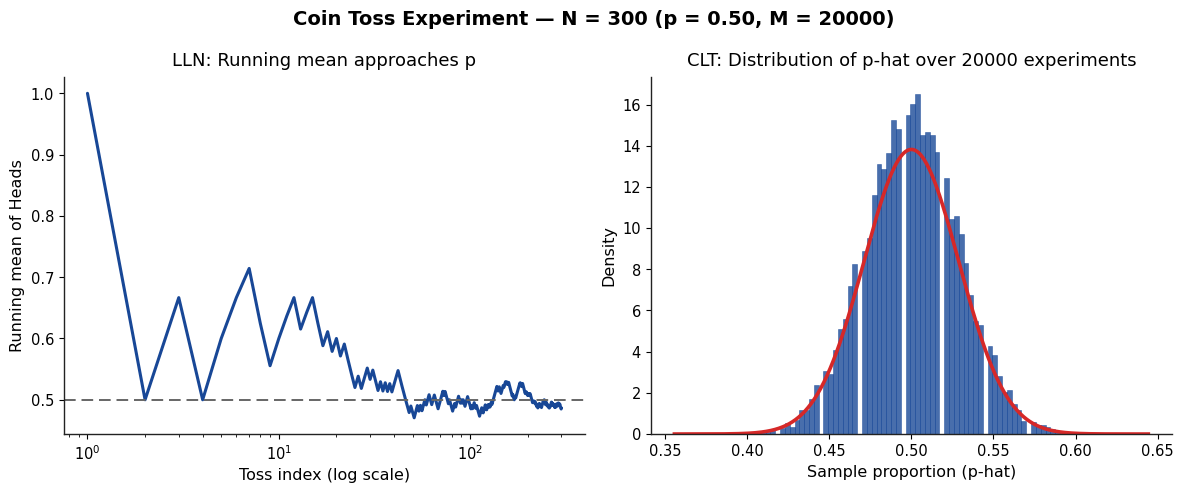

N =    800 | Heads =    403 | Tails =    397


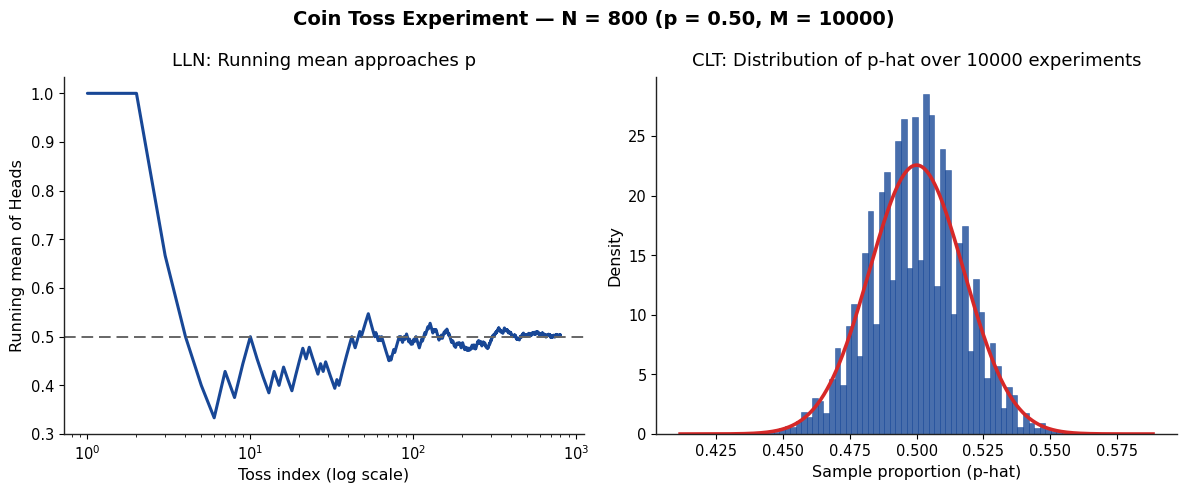

N =   1000 | Heads =    518 | Tails =    482


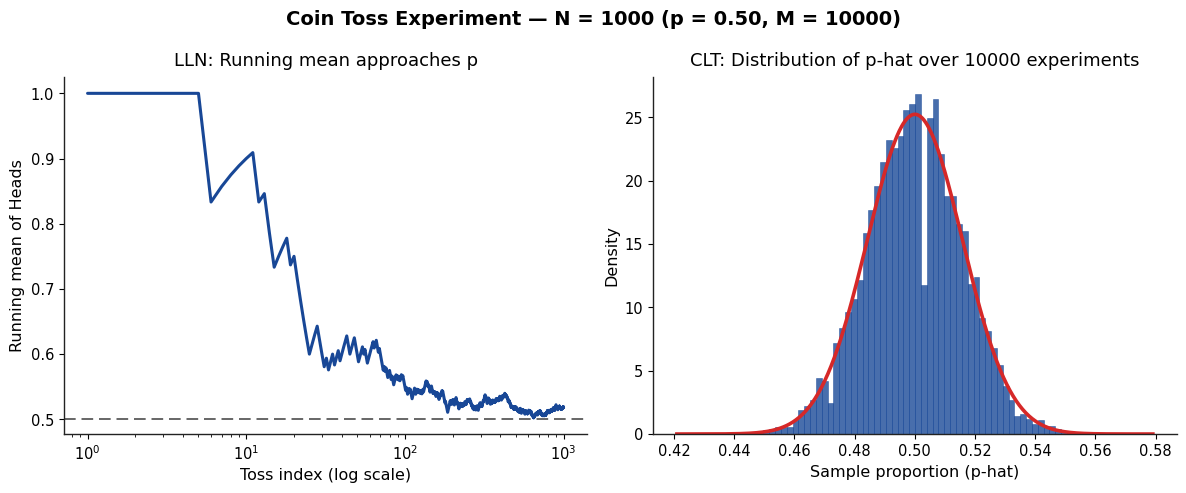

N =   2500 | Heads =   1263 | Tails =   1237


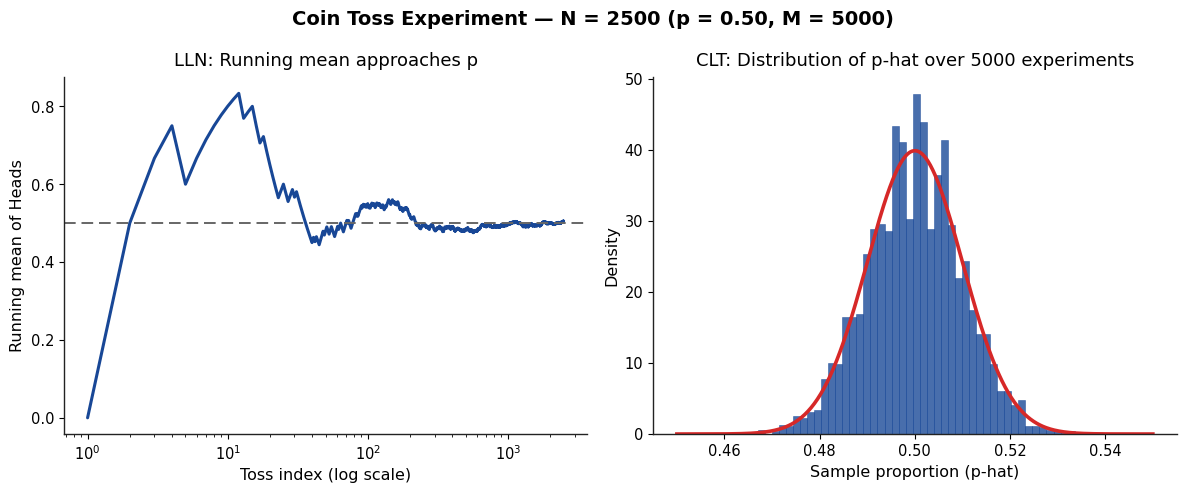

N =   4000 | Heads =   1997 | Tails =   2003


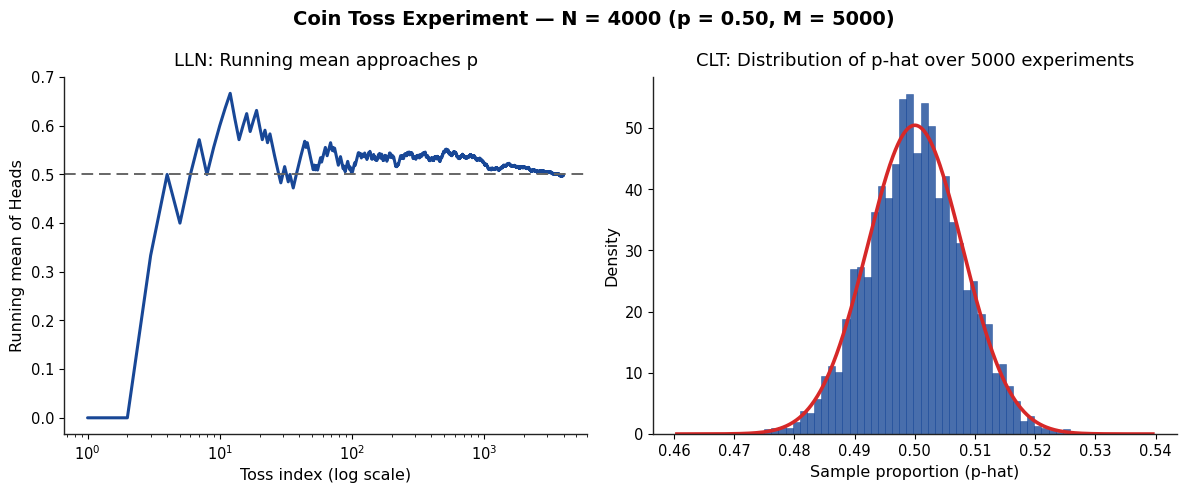

N =  10000 | Heads =   4932 | Tails =   5068


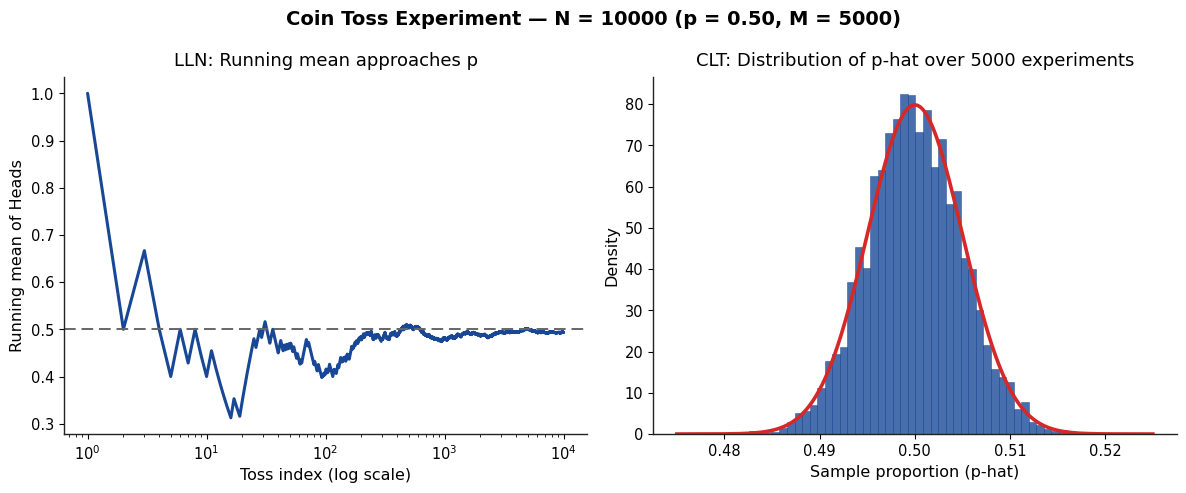

N =  50000 | Heads =  24893 | Tails =  25107


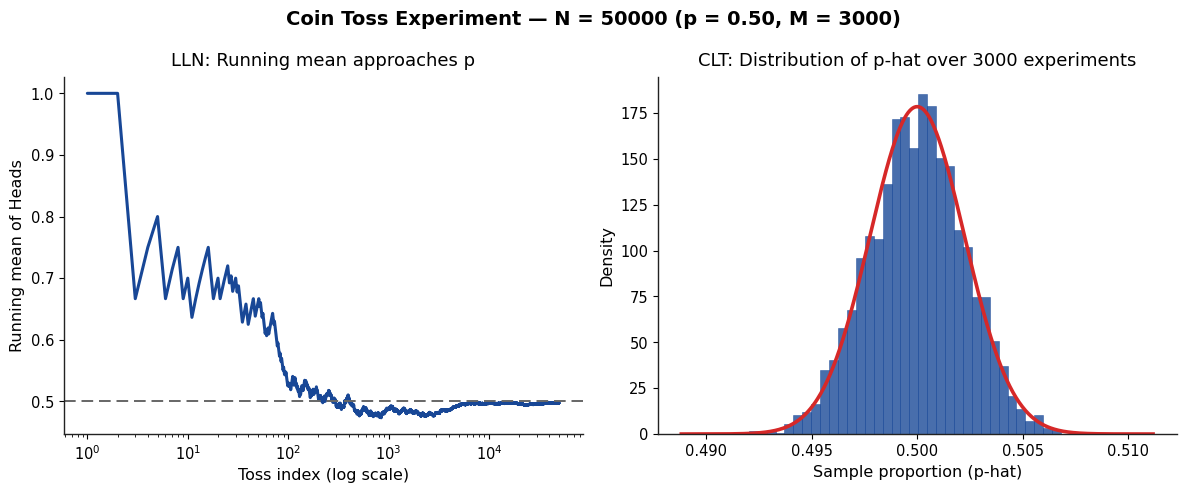

N = 100000 | Heads =  49936 | Tails =  50064


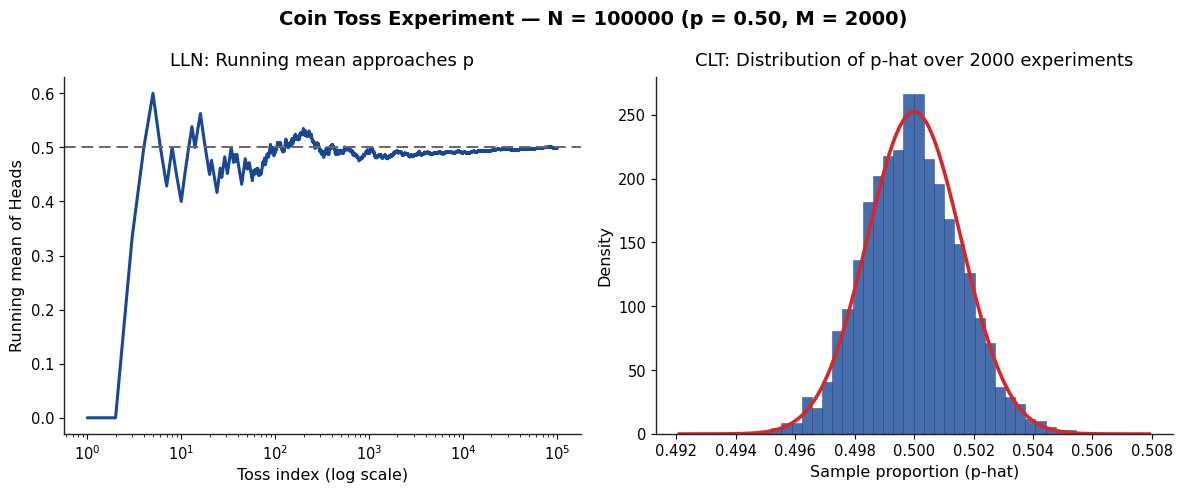

All experiments completed. Exiting.



In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Coin Toss Experiment — LLN & CLT
Author: Muhammed İkbal Yılmaz

Notebook-safe, professional revision:
- Ignores unknown CLI args (Jupyter's -f kernel.json) via parse_known_args()
- No blocking input unless --interactive is passed
- 11+ N schedule, adaptive M, Freedman–Diaconis bins, optional figure saving
"""

import sys
import math
import argparse
from typing import Optional, Sequence

import numpy as np
import matplotlib.pyplot as plt

# ----------------------- Configuration (defaults) -----------------------
NS_DEFAULT = [5, 30, 100, 300, 800, 1_000, 2_500, 4_000, 10_000, 50_000, 100_000]
PROB_HEAD_DEFAULT = 0.5        # fair coin
SEED_DEFAULT: Optional[int] = 42

# Visual palette
DEEP_BLUE = "#0B3D91"
DEEP_BLUE_EDGE = "#0B3D91"
NORMAL_RED = "#D62828"

plt.rcParams.update({
    "figure.figsize": (12, 5),
    "axes.titlesize": 13,
    "axes.labelsize": 11.5,
    "xtick.labelsize": 10.5,
    "ytick.labelsize": 10.5,
    "figure.autolayout": False,
})

# ----------------------- Utilities -----------------------
def make_rng(seed: Optional[int]) -> np.random.Generator:
    """Create a NumPy Generator; seed=None → fresh randomness."""
    return np.random.default_rng(None if seed is None else seed)

def style_axes_minimal(ax, keep=("left", "bottom")):
    for side in ("top", "right", "left", "bottom"):
        ax.spines[side].set_visible(False)
    for side in keep:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linewidth(1.0)
        ax.spines[side].set_color("#222222")
    ax.yaxis.set_ticks_position("left" if "left" in keep else "none")
    ax.xaxis.set_ticks_position("bottom" if "bottom" in keep else "none")
    ax.grid(False)

def single_run_sequence(n: int, p: float, rng: np.random.Generator) -> np.ndarray:
    """Generate one sequence of n coin tosses (1=heads, 0=tails)."""
    return (rng.random(n) < p).astype(np.int8)

def running_mean_from_sequence(seq: np.ndarray) -> np.ndarray:
    cumsum = np.cumsum(seq, dtype=np.int64)
    k = np.arange(1, len(seq) + 1, dtype=float)
    return cumsum / k

def sampling_distribution_p_hat(n: int, m: int, p: float, rng: np.random.Generator) -> np.ndarray:
    samples = rng.random((m, n)) < p
    return samples.mean(axis=1).astype(float)

def normal_pdf(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    if sigma <= 0:
        return np.zeros_like(x)
    coef = 1.0 / (math.sqrt(2.0 * math.pi) * sigma)
    z = (x - mu) / sigma
    return coef * np.exp(-0.5 * z * z)

def adaptive_reps(n: int) -> int:
    if n <= 300:
        return 20_000
    elif n <= 1_000:
        return 10_000
    elif n <= 10_000:
        return 5_000
    elif n <= 50_000:
        return 3_000
    else:
        return 2_000

def freedman_diaconis_bins(data: np.ndarray, min_bins: int = 25, max_bins: int = 160) -> int:
    d = np.asarray(data, dtype=float)
    if d.size <= 1:
        return max(10, min_bins)
    q1, q3 = np.percentile(d, [25, 75])
    iqr = q3 - q1
    n = d.size
    if iqr <= 0:
        bins = int(np.sqrt(n))
    else:
        h = 2 * iqr / (n ** (1/3))
        data_range = d.max() - d.min()
        bins = int(np.ceil(data_range / h)) if (h > 0 and data_range > 0) else int(np.sqrt(n))
    return int(np.clip(bins, min_bins, max_bins))

def plot_lln_and_clt(seq: np.ndarray, p: float, m_reps: int, outpath: Optional[str] = None):
    n = len(seq)
    running_mean = running_mean_from_sequence(seq)

    rng_local = make_rng(None)  # independent stream for the histogram
    p_hats = sampling_distribution_p_hat(n, m_reps, p, rng_local)

    bins = freedman_diaconis_bins(p_hats)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Coin Toss Experiment — N = {n} (p = {p:.2f}, M = {m_reps})",
                 y=0.98, fontsize=14, fontweight="600")

    # Panel A: LLN
    ax = axes[0]
    ax.plot(np.arange(1, n + 1), running_mean, linewidth=2.2, color=DEEP_BLUE,
            solid_capstyle="round", alpha=0.95)
    ax.axhline(p, linestyle="--", linewidth=1.4, color="#666666", dashes=(6, 3))
    ax.set_xscale("log")
    ax.set_xlabel("Toss index (log scale)")
    ax.set_ylabel("Running mean of Heads")
    ax.set_title("LLN: Running mean approaches p", pad=8)
    style_axes_minimal(ax, keep=("left", "bottom"))

    # Panel B: CLT
    ax2 = axes[1]
    ax2.hist(
        p_hats,
        bins=bins,
        density=True,
        alpha=0.75,
        color=DEEP_BLUE,
        edgecolor=DEEP_BLUE_EDGE,
        linewidth=0.4,
    )
    ax2.set_xlabel("Sample proportion (p-hat)")
    ax2.set_ylabel("Density")
    ax2.set_title(f"CLT: Distribution of p-hat over {m_reps} experiments", pad=8)

    mu = p
    sigma = math.sqrt(p * (1.0 - p) / n)
    x_min = max(0.0, mu - 5 * sigma)
    x_max = min(1.0, mu + 5 * sigma)
    x = np.linspace(x_min, x_max, 600)
    ax2.plot(x, normal_pdf(x, mu, sigma), linewidth=2.6, color=NORMAL_RED)

    style_axes_minimal(ax2, keep=("left", "bottom"))
    fig.tight_layout(pad=1.2)

    if outpath:
        fig.savefig(outpath, dpi=160, bbox_inches="tight")
    plt.show()
    plt.close(fig)

# ----------------------- Main routine -----------------------
def run_experiment(
    NS: Sequence[int],
    p: float,
    seed: Optional[int],
    interactive: bool,
    outdir: Optional[str],
):
    rng = make_rng(seed)

    print("\nCoin Toss Experiment — LLN & CLT")
    print("Sequence lengths (N):", list(NS))
    print(f"p = {p:.2f} | seed = {seed}\n")

    for n in NS:
        if interactive:
            msg = input(f"Ready for N = {n} tosses. Press <Enter>, or 'q' to quit: ")
            if msg.strip().lower() == "q":
                print("Exiting. Bye!")
                return

        seq = single_run_sequence(n, p=p, rng=rng)
        heads = int(seq.sum())
        tails = n - heads
        print(f"N = {n:>6} | Heads = {heads:>6} | Tails = {tails:>6}")

        m_reps = adaptive_reps(n)
        outpath = f"{outdir}/lln_clt_N{n}_M{m_reps}.png" if outdir else None
        plot_lln_and_clt(seq, p=p, m_reps=m_reps, outpath=outpath)

    print("All experiments completed. Exiting.\n")

def parse_args():
    parser = argparse.ArgumentParser(
        description="Coin Toss Experiment — LLN & CLT (notebook-safe by default)",
        add_help=True,
    )
    parser.add_argument("--p", type=float, default=PROB_HEAD_DEFAULT,
                        help="Head probability p (default: 0.5).")
    parser.add_argument("--seed",
                        type=lambda s: None if str(s).lower() == "none" else int(s),
                        default=SEED_DEFAULT,
                        help="Random seed (int) or 'None' for fresh randomness (default: 42).")
    parser.add_argument("--interactive", action="store_true",
                        help="Ask before each run (uses input()); avoid this in notebooks.")
    parser.add_argument("--outdir", type=str, default=None,
                        help="If set, save each figure as PNG into this directory.")
    parser.add_argument("--ns", type=str, default=None,
                        help=("Optional custom N list, e.g. "
                              "'5,30,100,300,800,1000,2500,4000,10000,50000,100000'."))
    # <-- The key fix: ignore unknown args injected by ipykernel (e.g., -f kernel.json)
    args, _unknown = parser.parse_known_args()
    return args

if __name__ == "__main__":
    try:
        args = parse_args()
        NS = [int(x.strip()) for x in args.ns.split(",")] if args.ns else NS_DEFAULT
        run_experiment(
            NS=NS,
            p=args.p,
            seed=args.seed,
            interactive=args.interactive,
            outdir=args.outdir,
        )
    except KeyboardInterrupt:
        print("\nInterrupted. Bye!")
        sys.exit(0)
    except Exception as e:
        print(f"\nERROR: {type(e).__name__}: {e}", file=sys.stderr)
        sys.exit(1)


As the number of coin tosses increases, the empirical proportion of heads $\hat p_n=\tfrac{1}{n}\sum_{i=1}^n X_i$ converges to the true probability $p$; for a fair coin $p=0.5$, so by the Law of Large Numbers $\hat p_n \to 0.5$ as $n\to\infty$. Simultaneously, across repeated experiments of fixed size $n$, the Central Limit Theorem implies that $\hat p_n \approx \mathcal{N}(0.5,\,0.25/n)$, so the histogram of sample proportions becomes increasingly concentrated and approximately Normal as $n$ grows. Empirically, by around $n\gtrsim 10^4$, the running mean typically lies very close to $0.5$, illustrating convergence of the empirical results to the theoretical expectation.


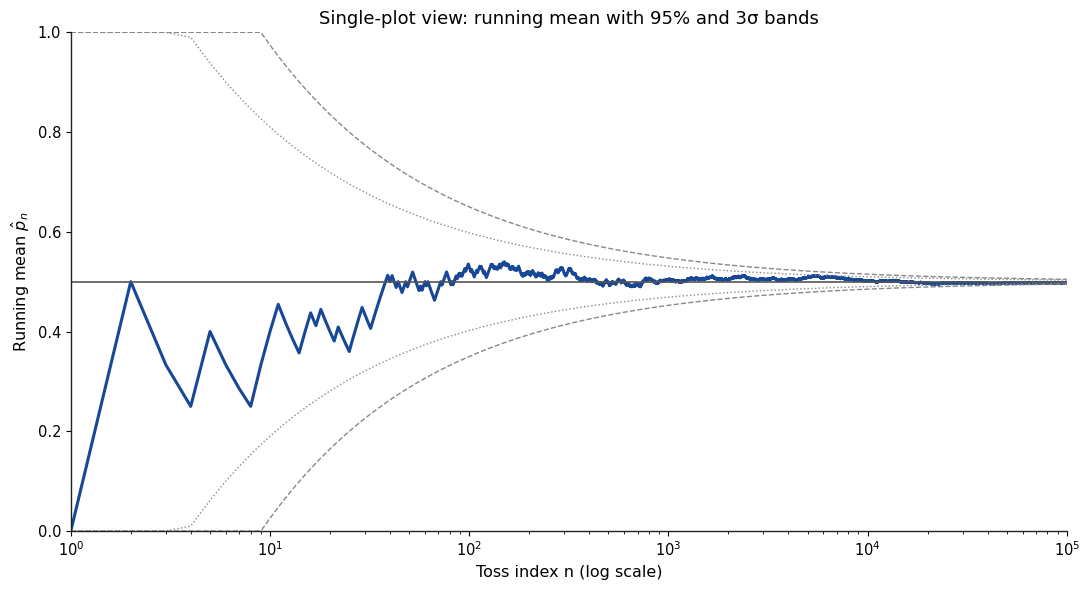

[INFO] Figure saved to: plots/running_mean_single_N100000_K1_p0.50.png


In [5]:
# --- Single-plot view of coin-toss characteristics (running mean + bands)
# --- Author: Muhammed İkbal Yılmaz
# --- Purpose: Show, in ONE figure,
#     (i) running means (p̂_n) of K independent coin-toss sequences,
#     (ii) the target probability line p,
#     (iii) Normal-approximation bands: 95% (±1.96·SE) and 3σ (±3·SE).
# --- Plus: optional saving to disk (save=True) with automatic folder creation.

import os
import numpy as np
import matplotlib.pyplot as plt

# --- Color palette (define if not provided elsewhere) ---------------------
try:
    DEEP_BLUE
except NameError:
    DEEP_BLUE = "#0B3D91"
try:
    NORMAL_RED
except NameError:
    NORMAL_RED = "#D62828"

# --- Minimal axis styling -------------------------------------------------
def _style_axes_minimal(ax, keep=("left", "bottom")):
    for side in ("top", "right", "left", "bottom"):
        ax.spines[side].set_visible(False)
    for side in keep:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_linewidth(1.0)
        ax.spines[side].set_color("#222222")
    ax.yaxis.set_ticks_position("left" if "left" in keep else "none")
    ax.xaxis.set_ticks_position("bottom" if "bottom" in keep else "none")
    ax.grid(False)

# --- Main plotting function ----------------------------------------------
def plot_running_mean_single_graph(
    N=100_000,            # total number of tosses per path
    p=0.5,                # Bernoulli parameter (probability of heads)
    K=1,                  # number of independent paths to overlay
    seed=42,              # RNG seed for reproducibility
    save=False,           # if True, save figure to disk
    outdir="plots",       # output directory
    filename=None,        # file name (auto-generated if None)
    dpi=160,              # save resolution (dots per inch)
    show=True             # whether to display the figure
):
    """
    Single-plot visualization of coin-toss characteristics.

    Draws:
      • K independent running means p̂_n (one emphasized, others lighter),
      • the target probability line p,
      • Normal-approximation bands p ± 1.96·SE and p ± 3·SE
        where SE(n) = sqrt(p(1-p)/n). Bands are clipped to [0, 1].

    Returns:
      saved_path (str | None): file path if saved, else None.
    """
    rng = np.random.default_rng(seed)
    n = np.arange(1, N + 1)

    fig, ax = plt.subplots(figsize=(11, 6))

    # Multiple independent paths (overlay on the same axes)
    for k in range(K):
        seq = (rng.random(N) < p).astype(np.int8)           # 1=heads, 0=tails
        run_mean = np.cumsum(seq, dtype=np.int64) / n       # p̂_n = (1/n)∑ X_i
        lw = 2.2 if k == 0 else 1.0
        alpha = 0.95 if k == 0 else 0.35
        ax.plot(n, run_mean, color=DEEP_BLUE, lw=lw, alpha=alpha)

    # Target line at p
    ax.axhline(p, color="#555555", lw=1.2)

    # Normal-approximation bands
    se = np.sqrt(p * (1 - p) / n)
    for z, style, label in [(1.96, ":", "95% band"), (3.0, "--", "3σ band")]:
        upper = np.minimum(1.0, p + z * se)
        lower = np.maximum(0.0, p - z * se)
        ax.plot(n, upper, style, color="#888888", lw=1.0)
        ax.plot(n, lower, style, color="#888888", lw=1.0)

    # Axes & labels
    ax.set_xscale("log")
    ax.set_xlim(1, N)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel("Toss index n (log scale)")
    ax.set_ylabel(r"Running mean $\hat{p}_n$")  # <-- raw string avoids invalid escape warning
    ax.set_title("Single-plot view: running mean with 95% and 3σ bands")
    _style_axes_minimal(ax, keep=("left", "bottom"))
    plt.tight_layout()

    # Optional saving
    saved_path = None
    if save:
        os.makedirs(outdir, exist_ok=True)
        if filename is None:
            filename = f"running_mean_single_N{N}_K{K}_p{p:.2f}.png"
        saved_path = os.path.join(outdir, filename)
        fig.savefig(saved_path, dpi=dpi, bbox_inches="tight")

    # Show & cleanup
    if show:
        plt.show()
    plt.close(fig)

    return saved_path


# Example usage
if __name__ == "__main__":
    path = plot_running_mean_single_graph(
        N=100_000,
        p=0.5,
        K=1,
        seed=42,
        save=True,
        outdir="plots",
        filename=None,
        dpi=180,
        show=True
    )
    if path:
        print(f"[INFO] Figure saved to: {path}")

    # # Overlay multiple paths (e.g., K=8) without saving:
    # plot_running_mean_single_graph(N=100_000, p=0.5, K=8, seed=42, save=False, show=True)
